<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)


    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df['species'] = my_df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})




In [7]:
X = my_df.drop('species',axis=1).values
y = my_df['species'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [10]:
# convert X,y
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose adam optimizer,lr = learning rate(if error doesn't go down should decrease lr)
optimizer = torch.optim.Adam(model.parameters(),lr=0.0091)

In [12]:
# Train model
# Epochs (one run thru all the training data in our network)
epochs = 1800
losses = []
for i in range(epochs):

# go forward and get a prediction
    y_pred = model.forward(X_train)         # get predicted results

# measure the loss/error, high at first
    loss = criterion(y_pred,y_train)        #predicted value vs the y_train value

# keep track of losses
    losses.append(loss.detach().numpy())

# print every 10 epochs
    if i % 10 == 0 :
     print(f'Epoch:{i} and loss:{loss}')

 # do some back propagation: take the error rate of forward propagation and feed it back words
 # thru the networks to fine tune the weights
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()


Epoch:0 and loss:1.169895887374878
Epoch:10 and loss:1.1339794397354126
Epoch:20 and loss:1.1027908325195312
Epoch:30 and loss:1.0759919881820679
Epoch:40 and loss:1.0537554025650024
Epoch:50 and loss:1.034684419631958
Epoch:60 and loss:1.019136905670166
Epoch:70 and loss:1.0060210227966309
Epoch:80 and loss:0.9942285418510437
Epoch:90 and loss:0.9831199049949646
Epoch:100 and loss:0.9705972075462341
Epoch:110 and loss:0.9569019675254822
Epoch:120 and loss:0.9421079754829407
Epoch:130 and loss:0.9262900948524475
Epoch:140 and loss:0.9092826247215271
Epoch:150 and loss:0.891714334487915
Epoch:160 and loss:0.8747509717941284
Epoch:170 and loss:0.8586130738258362
Epoch:180 and loss:0.8441287875175476
Epoch:190 and loss:0.8324451446533203
Epoch:200 and loss:0.8206920027732849
Epoch:210 and loss:0.8085577487945557
Epoch:220 and loss:0.7960841655731201
Epoch:230 and loss:0.7832003831863403
Epoch:240 and loss:0.7702319025993347
Epoch:250 and loss:0.7571703791618347
Epoch:260 and loss:0.743209

Text(0.5, 0, 'Epoch')

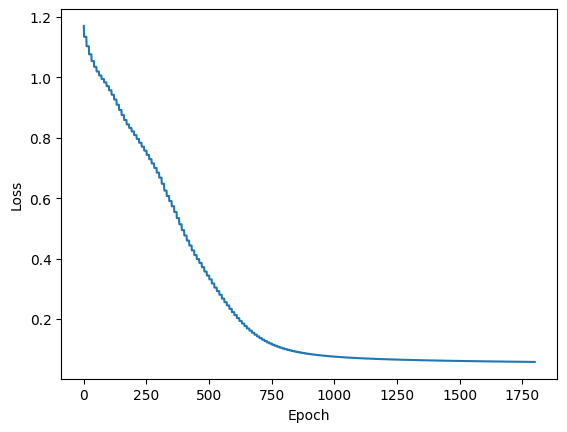

In [13]:
# graph it
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [14]:
# evaluate model on test data set (validate model on test set)
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [15]:
loss

tensor(0.0338)

In [16]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t{ y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
         correct += 1

    print( f'We got {correct} correct!')


1. tensor([-4.2813,  5.2053,  0.5356]) 	 1 	1
2. tensor([  9.3254,   2.0241, -13.8749]) 	 0 	0
3. tensor([  8.3834,   2.2267, -12.8325]) 	 0 	0
4. tensor([-4.4388,  5.5185,  0.4109]) 	 1 	1
5. tensor([-9.1986,  3.5698,  6.5678]) 	 2 	2
6. tensor([-9.6582,  4.7440,  6.0870]) 	 2 	2
7. tensor([  7.8916,   2.4075, -12.3495]) 	 0 	0
8. tensor([  8.7827,   2.0809, -13.2222]) 	 0 	0
9. tensor([-3.7295,  5.5501, -0.3361]) 	 1 	1
10. tensor([  9.0860,   2.0904, -13.6227]) 	 0 	0
11. tensor([-4.6371,  5.9323,  0.4156]) 	 1 	1
12. tensor([-10.9649,   2.3893,   8.9744]) 	 2 	2
13. tensor([-2.2031,  5.0504, -1.3873]) 	 1 	1
14. tensor([-1.3652,  5.7020, -2.8081]) 	 1 	1
15. tensor([-9.3639,  3.3305,  6.7969]) 	 2 	2
16. tensor([-10.6447,   1.9716,   8.9481]) 	 2 	2
17. tensor([-4.9232,  4.7284,  1.4531]) 	 1 	1
18. tensor([-8.2679,  3.6736,  5.5194]) 	 2 	2
19. tensor([-2.0049,  5.4914, -1.9652]) 	 1 	1
20. tensor([  9.8155,   2.1478, -14.6164]) 	 0 	0
21. tensor([  8.6105,   2.3598, -13.2420]) 	 

In [17]:
new_iris = torch.tensor([[4.7,3.2,1.3,0.2]])

In [18]:
with torch.no_grad():
    print(model(new_iris))


tensor([[  8.8079,   1.8935, -13.0917]])


In [19]:
# save and load nn model
torch.save(model.state_dict(),'iris_model.pt')

In [20]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-20-759ffd7e7e10>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [21]:
# make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)